In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import csv

In [5]:
#LOAD THE CSV DATA
iris = pd.read_csv(r"/content/gdrive/MyDrive/Bharat Intern/iris.csv")

In [6]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.shape

(150, 6)

In [8]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [9]:
#DELETING ID COLUMN
iris = iris.drop(columns = ['Unnamed: 0'])
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
#CHECK NULL VALUES
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [14]:
#Data analysis

n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

n1 = len(iris[iris['Species']=='setosa'])
print("No of setosa in dataset",n)

n2 = len(iris[iris['Species']=='virginica'])
print("No of virginica in dataset",n)

No of Versicolor in Dataset: 50
No of setosa in dataset 50
No of virginica in dataset 50


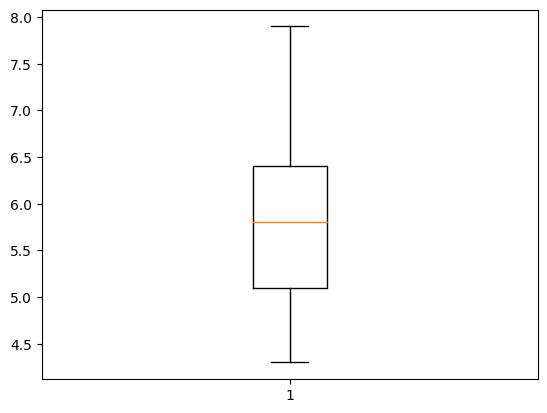

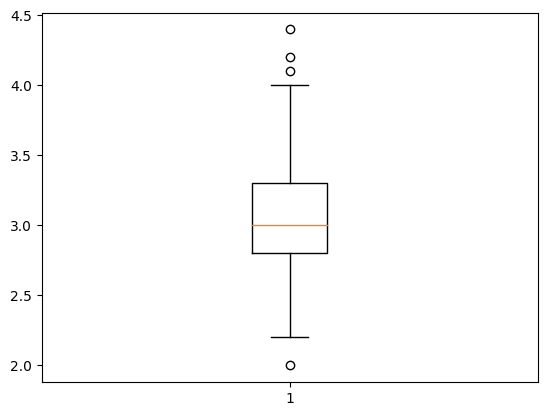

In [15]:
#Checking for outliars

plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

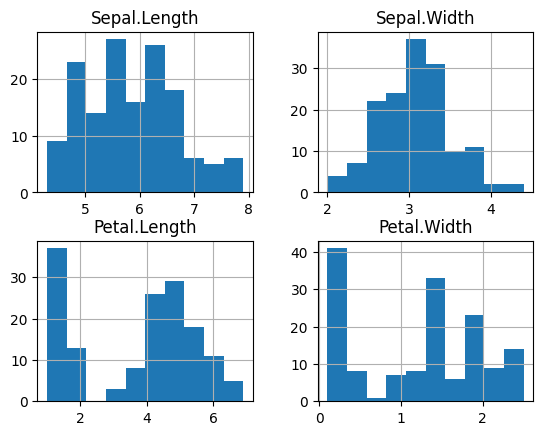

<Figure size 1000x700 with 0 Axes>

In [16]:
iris.hist()
plt.figure(figsize=(10,7))
plt.show()

In [17]:
#Create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']

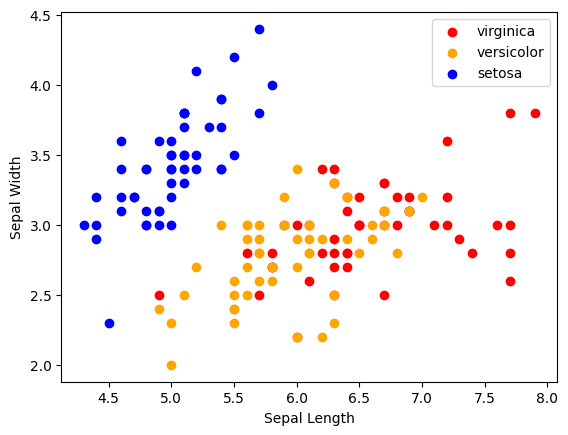

In [18]:
for i in range(3):
  #filter data on each class
  x = iris[iris['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

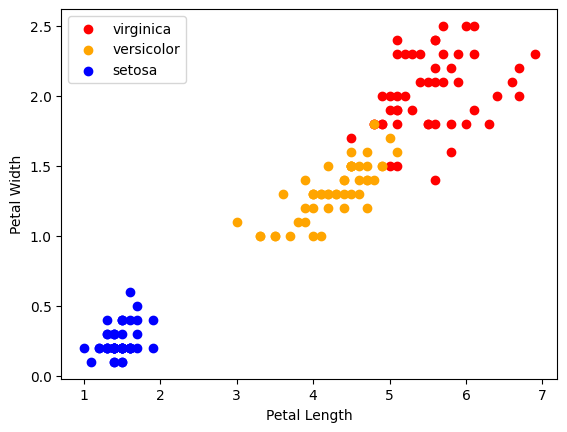

In [19]:
for i in range(3):
  #filter data on each class
  x = iris[iris['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

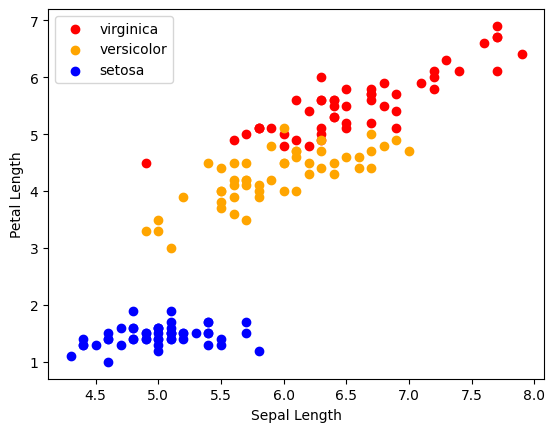

In [20]:
for i in range(3):
  #filter data on each class
  x = iris[iris['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

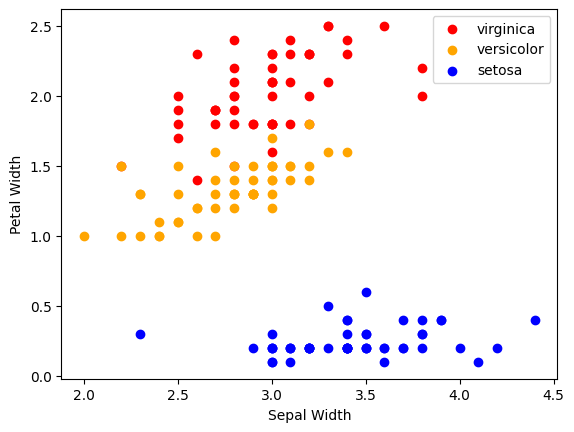

In [21]:
for i in range(3):
  #filter data on each class
  x = iris[iris['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

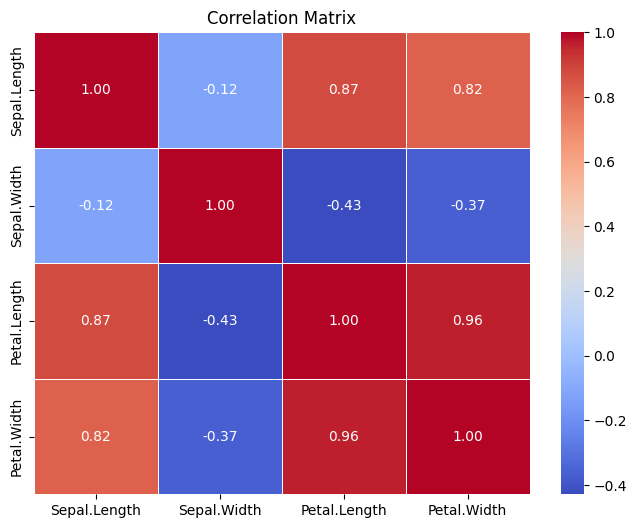

In [22]:
#CORRELATION MATRIX

# Create a temporary DataFrame excluding the 'species' column
numeric_columns = iris.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
#MODEL TRAINING & TESTING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [24]:
#inpot data
Y = iris['Species']
x_train, x_test, y_train, y_test = train_test_split(numeric_columns,Y, test_size=0.30)

In [25]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  97.77777777777777


In [26]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [27]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [28]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  97.77777777777777


In [29]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [30]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [31]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  95.55555555555556


In [32]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [33]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [34]:
#save the model
filename = 'save_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
#save the updated model
filename = 'save_model.sav'
try:
  with open(filename, 'wb') as file:
    pickle.dump(model, file)
  print("Model saved successfully.")
except Exception as e:
  print(f"Error saving the model: {e}")

Model saved successfully.


In [36]:
load_model = pickle.load(open(filename, 'rb'))

In [37]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['versicolor'], dtype=object)

In [38]:
print(sklearn.__version__)

1.2.2


In [39]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
138,6.0,3.0,4.8,1.8
121,5.6,2.8,4.9,2.0
109,7.2,3.6,6.1,2.5
104,6.5,3.0,5.8,2.2
141,6.9,3.1,5.1,2.3


In [40]:
load_model.predict([[4, 3, 1, 5]])

array(['virginica'], dtype=object)